<a href="https://colab.research.google.com/github/galudSla/stroke-prediction/blob/main/column_drop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd


In [3]:
url = 'https://raw.githubusercontent.com/galudSla/stroke-prediction/main/healthcare-dataset-stroke-data.csv'
df_1 = pd.read_csv(url)
df_1 = df_1.dropna(axis=1).reset_index(drop=True)

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sn

In [5]:
def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    df_cm = pd.DataFrame(confusion_matrix, index=class_names, columns=class_names)
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sn.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('Truth')
    plt.xlabel('Prediction')

Manual Label Encoding - Ordered data

In [6]:
df_1.smoking_status = df_1.smoking_status.map({
    'Unknown': 0,
    'never smoked': 1,
    'formerly smoked': 2,
    'smokes': 3,
})

Label Encoding - Binary Data (unordered) Category Coding

In [7]:
attributes = list(df_1.columns)
for i in range(len(attributes)):
    if df_1.dtypes[i] ==  'object' and attributes[i] != 'smoking_status':
        df_1[attributes[i]] = df_1[attributes[i]].astype('category')
        df_1[attributes[i]] = df_1[attributes[i]].cat.codes

In [8]:
df_1 = df_1.drop(['id'],axis='columns')

In [9]:
x_train, x_test, y_train, y_test = train_test_split(df_1.drop(['stroke'],axis='columns'), df_1.stroke, test_size=0.25)
model = RandomForestClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1219
           1       0.00      0.00      0.00        59

    accuracy                           0.95      1278
   macro avg       0.48      0.50      0.49      1278
weighted avg       0.91      0.95      0.93      1278



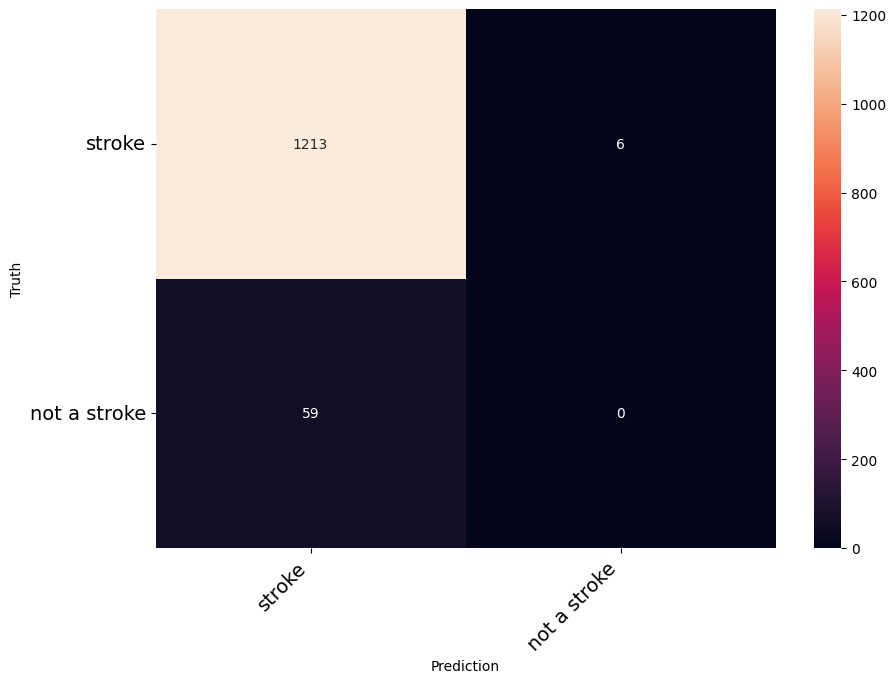

In [10]:
cm = confusion_matrix(y_test, y_pred)
print_confusion_matrix(cm, ['stroke','not a stroke'])
print(classification_report(y_test, y_pred))